In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def optical_flow_sample(frame1_gray, frame2_gray):
    # Computes dense optical flow using the Farneback algorithm
    flow = cv2.calcOpticalFlowFarneback(frame1_gray, frame2_gray, 
                                        None,
                                        0.5, 3, 15, 3, 5, 1.2, 0)

    # Defines mask for optical flow visualization
    mask = np.zeros((*frame1_gray.shape,3), dtype=np.uint8)

    # Sets image saturation to maximum
    mask[..., 1] = 255

    # Computes the magnitude and angle of the 2D vectors
    magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])

    # Sets image hue according to the optical flow 
    # direction
    mask[..., 0] = angle * 180 / np.pi / 2

    # Sets image value according to the optical flow
    # magnitude (normalized)
    mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)

    # Converts HSV to RGB (BGR) color representation
    bgr = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)

    return bgr

In [3]:
def show_flow(f1_path, f2_path):
    frame1_gray = cv2.imread(f1_path, cv2.IMREAD_GRAYSCALE)
    frame2_gray = cv2.imread(f2_path, cv2.IMREAD_GRAYSCALE)
    
    fig, axs = plt.subplots(ncols=2)
    axs[0].imshow(frame1_gray, cmap='gray')
    axs[1].imshow(frame2_gray, cmap='gray')
    plt.show()

    bgr = optical_flow_sample(frame1_gray, frame2_gray)
    plt.imshow(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB))
    plt.show()

In [4]:
enoe_dir = '/enoe'
os.listdir(enoe_dir)

['2019', '2018', '2021', '2022', '2020']

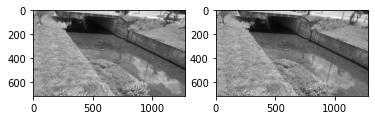

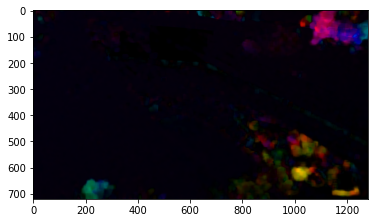

In [5]:
f1_path = os.path.join(enoe_dir, '2020/11/26/20201126_135322-SHOP2.jpg')
f2_path = os.path.join(enoe_dir, '2020/11/26/20201126_135915-SHOP2.jpg')
show_flow(f1_path, f2_path)

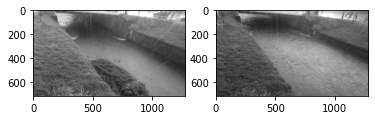

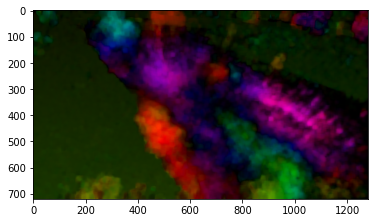

In [6]:
f1_path = os.path.join(enoe_dir, '2020/11/26/20201126_174127-SHOP2.jpg')
f2_path = os.path.join(enoe_dir, '2020/11/26/20201126_174720-SHOP2.jpg')
show_flow(f1_path, f2_path)

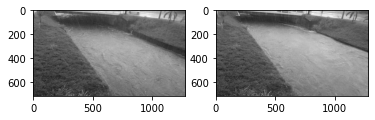

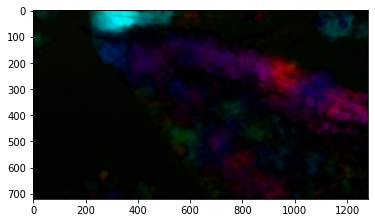

In [7]:
f1_path = os.path.join(enoe_dir, '2020/11/26/20201126_175313-SHOP2.jpg')
f2_path = os.path.join(enoe_dir, '2020/11/26/20201126_175907-SHOP2.jpg')
show_flow(f1_path, f2_path)

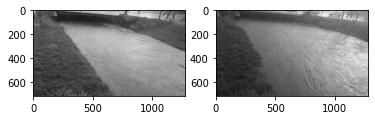

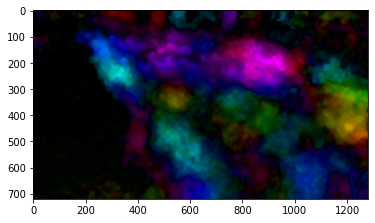

In [8]:
f1_path = os.path.join(enoe_dir, '2020/11/26/20201126_180057-SHOP2.jpg')
f2_path = os.path.join(enoe_dir, '2020/11/26/20201126_180703-SHOP2.jpg')
show_flow(f1_path, f2_path)